In [1]:
%load_ext autoreload
%autoreload 2
%debug
%matplotlib inline

ERROR:root:No traceback has been produced, nothing to debug.


In [114]:
import pandas as pd
import pandas_profiling

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import seaborn as sns
sns.set()

import numpy as np


import matplotlib.pyplot as plt

In [92]:
data = pd.read_excel("Training sheet.xlsx")
data_test = pd.read_excel("Scoring Sheet.xlsx")

In [121]:
data.iloc[:10]

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9
5,3480115,Alice in Wonderland (2010),Alice in Wonderland,2010,0,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for fantasy action/violence involving scary im...,PG,Wide,1024,9
6,27870115,"Dark Knight, The",The Dark Knight,2008,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,for intense sequences of violence and some men...,PG-13,Wide,1003,9
7,91710115,Pirates of the Caribbean: At Worlds End,Pirates of the Caribbean: At World's End,2007,1,Historical Fiction,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,961,9
8,50940115,Harry Potter and the Deathly Hallows: Part I,Harry Potter and the Deathly Hallows: Part I,2010,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,"for some sequences of intense action violence,...",PG-13,Wide,956,9
9,50990115,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix,2007,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for sequences of fantasy violence and frighten...,PG-13,Wide,943,9


In [93]:
data_test.head()

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,7970115,"Avengers, The (2011)",Marvel's The Avengers,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide
1,174540115,Dark Knight Rises The,The Dark Knight Rises,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide
2,149080115,Bond 23,Skyfall,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide
3,136020115,Twilight Saga Breaking Dawn Part 2 The,"The Twilight Saga: Breaking Dawn, Part 2",136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide
4,53500115,"Hobbit, The",The Hobbit: An Unexpected Journey,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide


In [129]:
data_test.production_year.unique()

array([2012])

How is the distribution of movies in the target variable - _Category_

Text(0, 0.5, 'Frequency')

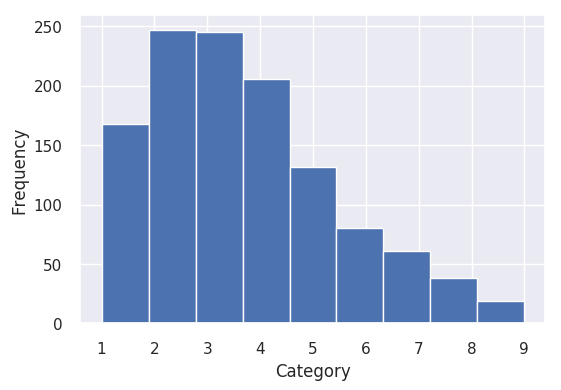

In [122]:
f = plt.figure(figsize=(6,4))

ax1 = f.add_subplot(111)
ax1.hist(data["Category"], bins=9)
ax1.set_xlabel("Category")
ax1.set_ylabel("Frequency")

In [23]:
# The histogram seems to be split - but this is just a problem with the plot (Verified)
data.groupby('Category').size()

Category
1    168
2    247
3    245
4    206
5    132
6     80
7     61
8     38
9     19
dtype: int64

Looks like we have a first increasing, and then decreasing histogram - most movies have a box-office gross revenue
in categories 2, 3 and 4 (10 to 40 million range). The number of movies in the upper range (8,9) are very less in comparison.

__Let us examine the variables in the training data__

Variable - Year: How does the distribution of _Category_ vary with the year?

Text(0, 0.5, 'Frequency')

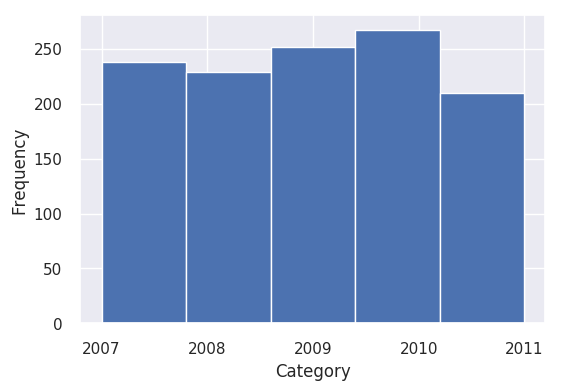

In [123]:
f = plt.figure(figsize=(6,4))

ax1 = f.add_subplot(111)
ax1.hist(data["production_year"],bins=5, align="mid")
ax1.set_xticks(list(range(2007,2012)))
ax1.set_xlabel("Category")
ax1.set_ylabel("Frequency")

The distribution of movies per year is roughly about the same (between 200 and 300)

__Distribution of movies by Year__

In [ ]:
f = plt.figure(figsize=(15,8))

ax1 = f.add_subplot(111)
ax1.hist(data["Category"])
ax1.set_xlabel("Year")
ax1.set_ylabel("Frequency")

Text(0.5, 1.0, '2011')

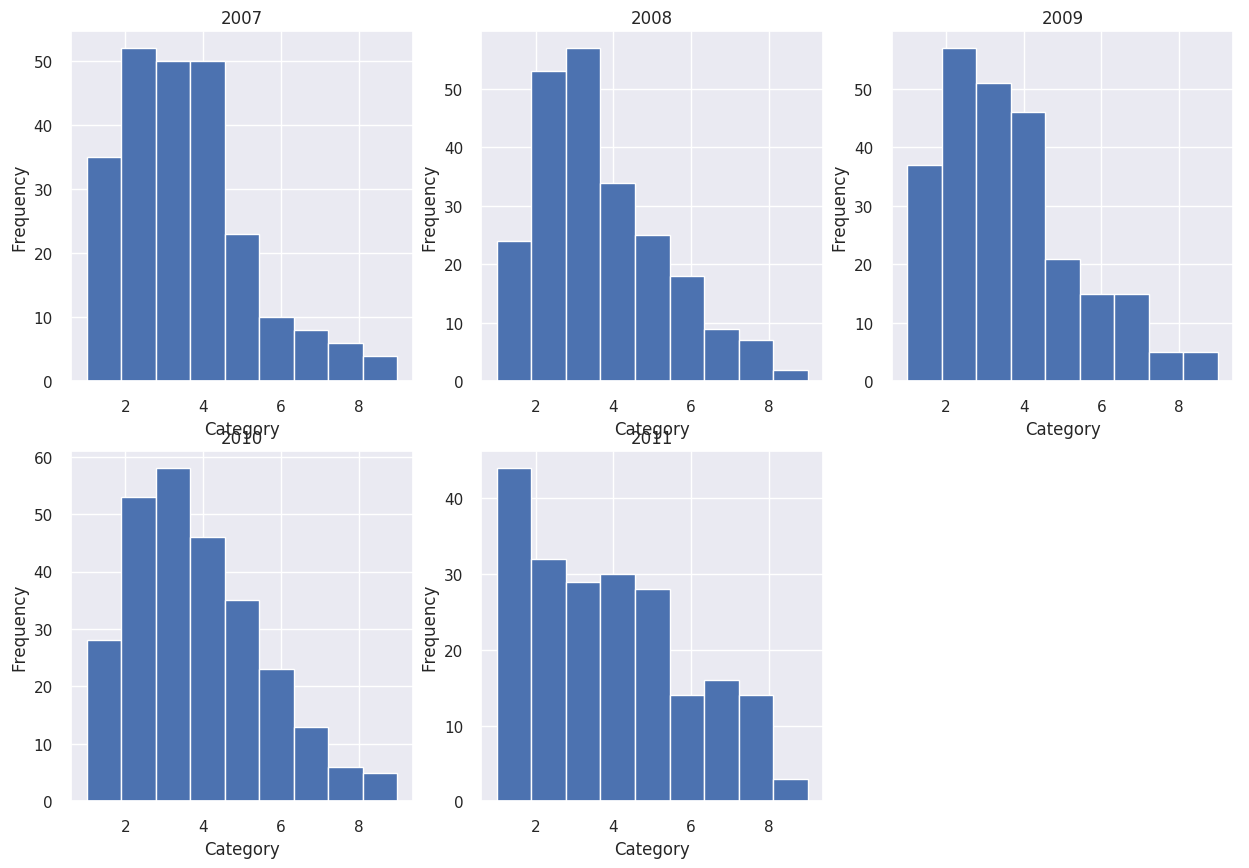

In [124]:
f = plt.figure(figsize=(15,10))


ax1 = f.add_subplot(231)
tmp1 = data[data.production_year == 2007]
ax1.hist(tmp1["Category"], bins=9)
ax1.set_xlabel("Category")
ax1.set_ylabel("Frequency")
ax1.set_title("2007")


ax2 = f.add_subplot(232)
tmp2 = data[data.production_year == 2008]
ax2.hist(tmp2["Category"], bins=9)
ax2.set_xlabel("Category")
ax2.set_ylabel("Frequency")
ax2.set_title("2008")


ax3 = f.add_subplot(233)
tmp3 = data[data.production_year == 2009]
ax3.hist(tmp3["Category"], bins=9)
ax3.set_xlabel("Category")
ax3.set_ylabel("Frequency")
ax3.set_title("2009")

ax4 = f.add_subplot(234)
tmp4 = data[data.production_year == 2010]
ax4.hist(tmp4["Category"], bins=9)
ax4.set_xlabel("Category")
ax4.set_ylabel("Frequency")
ax4.set_title("2010")

ax5 = f.add_subplot(235)
tmp5 = data[data.production_year == 2011]
ax5.hist(tmp5["Category"], bins=9)
ax5.set_xlabel("Category")
ax5.set_ylabel("Frequency")
ax5.set_title("2011")

There is a very small shift in the number of movies in each Category depending on the year - However, the pattern more or less remains the same. May be, we can exclude the year variable while modeling.

__Variable: Movie Sequel__

In [29]:
data.groupby("movie_sequel").size()

movie_sequel
0    1079
1     117
dtype: int64

There are 117 movies in the corpus which are sequels.

How does the distribution of _Category_ these groups vary?

Text(0.5, 1.0, 'Distribution of movies which are sequels')

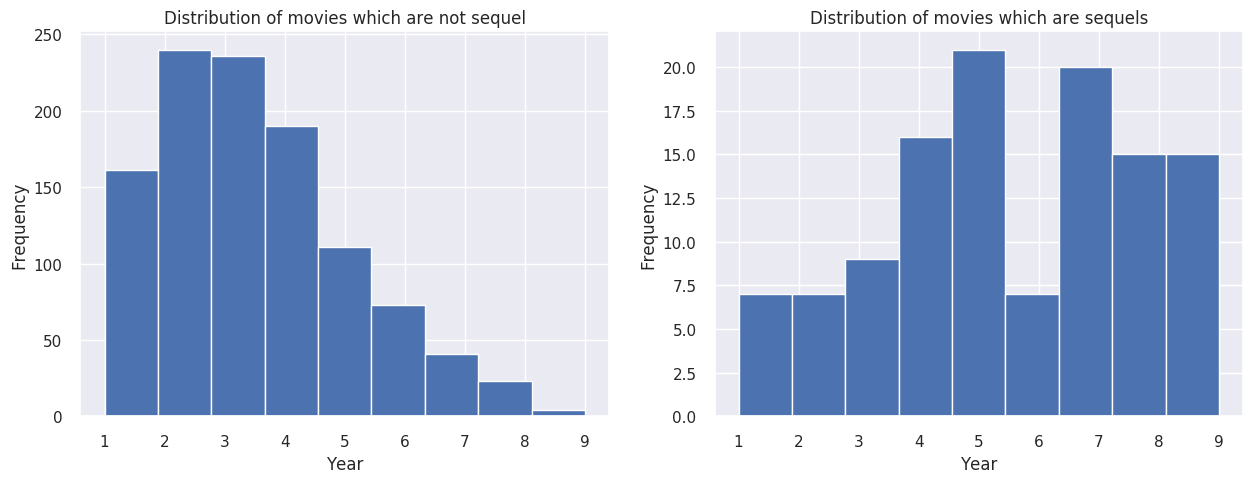

In [125]:
f = plt.figure(figsize=(15,5))

ax1 = f.add_subplot(121)
tmp1 = data[data.movie_sequel == 0]
ax1.hist(tmp1["Category"], bins=9)
ax1.set_xlabel("Year")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of movies which are not sequel")

ax2 = f.add_subplot(122)
tmp2 = data[data.movie_sequel == 1]
ax2.hist(tmp2["Category"], bins=9)
ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of movies which are sequels")

The number of movies which are sequels seems to have better chances of having a higher rating or even being a blockbuster compared to its counterpart.

__Variable: creative_type__

In [45]:
data.groupby("creative_type").size()

creative_type
Contemporary Fiction       638
Dramatization               95
Factual                     60
Fantasy                    131
Historical Fiction         100
Kids Fiction                59
Multiple Creative Types      4
Science Fiction             89
Super Hero                  20
dtype: int64

Text(0.5, 1.0, 'Super Hero')

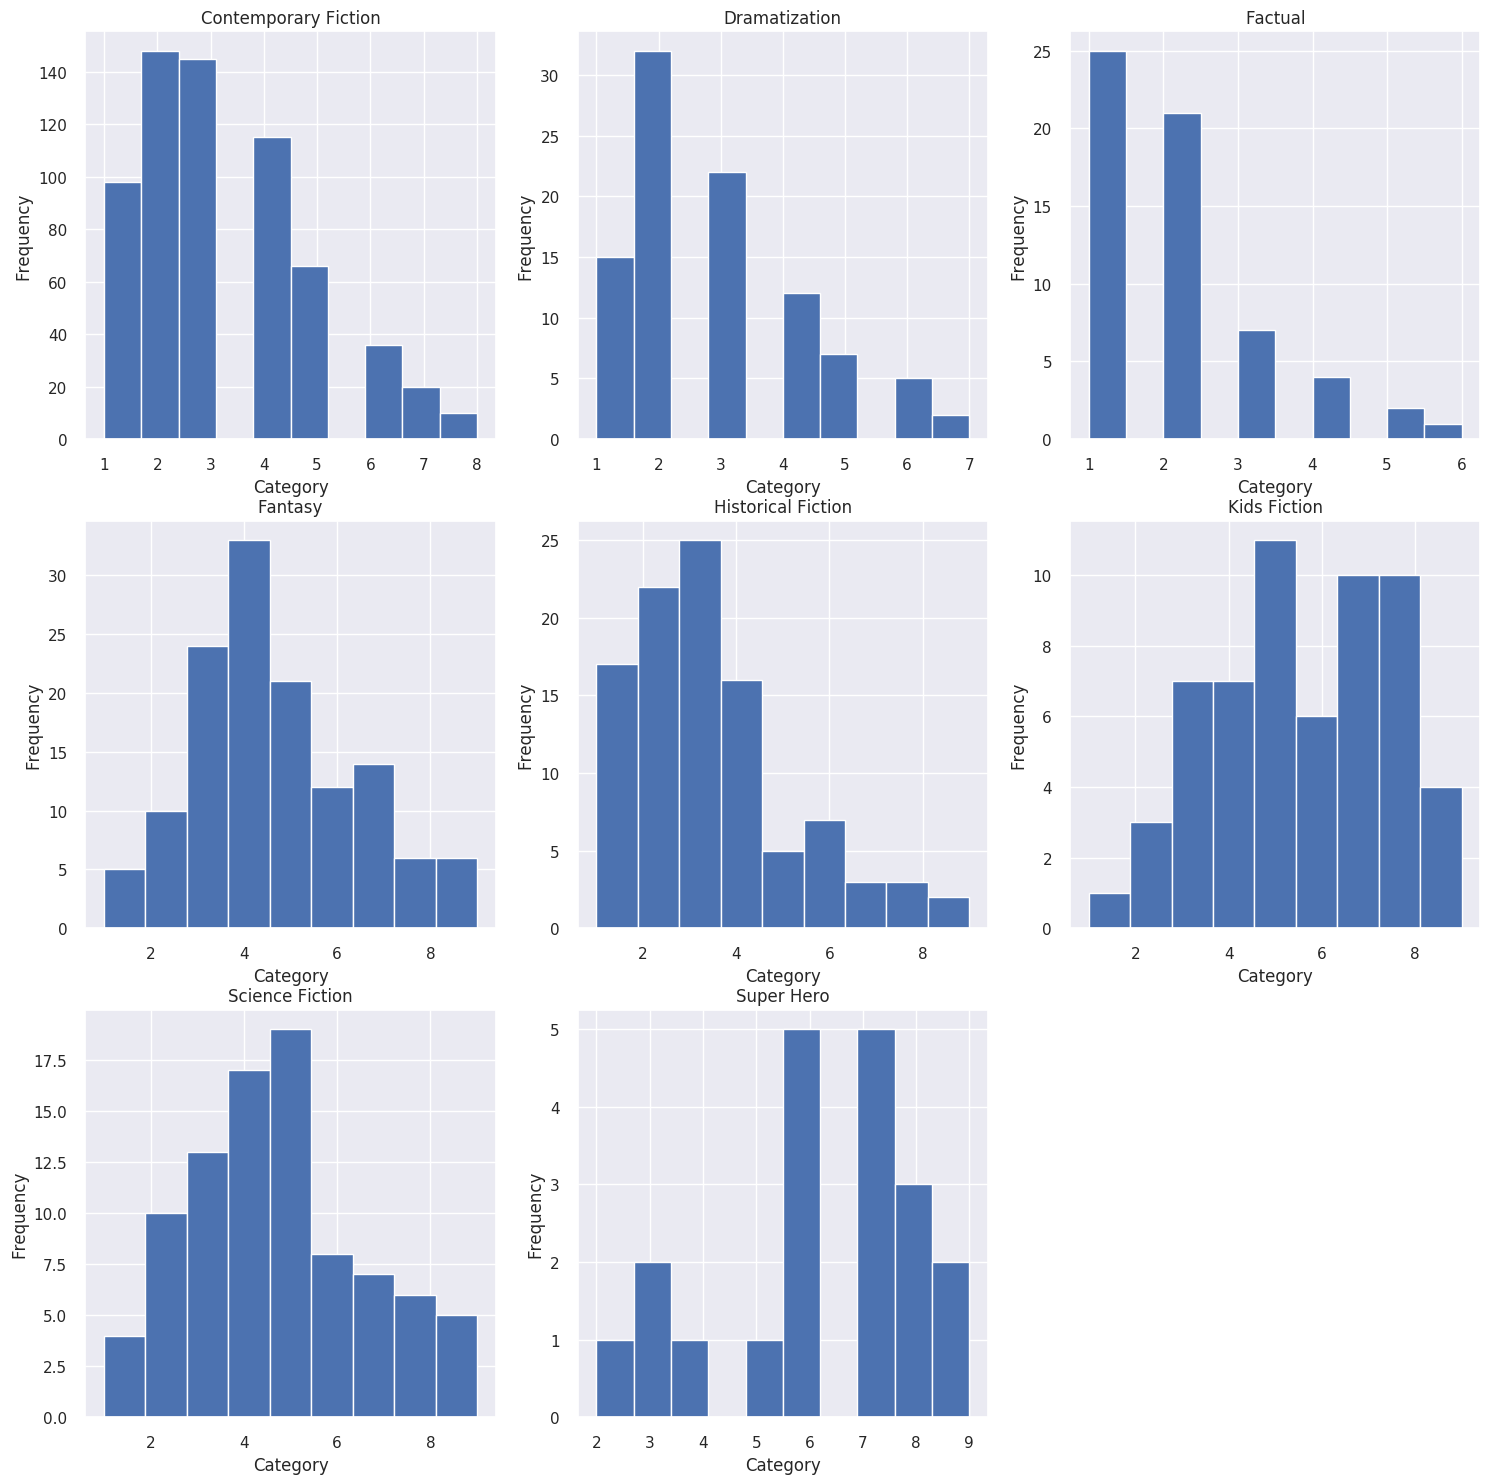

In [126]:
f = plt.figure(figsize=(18,18))


ax1 = f.add_subplot(331)
tmp1 = data[data.creative_type == "Contemporary Fiction"]
ax1.hist(tmp1["Category"])
ax1.set_xlabel("Category")
ax1.set_ylabel("Frequency")
ax1.set_title("Contemporary Fiction")

ax2 = f.add_subplot(332)
tmp2 = data[data.creative_type == "Dramatization"]
ax2.hist(tmp2["Category"])
ax2.set_xlabel("Category")
ax2.set_ylabel("Frequency")
ax2.set_title("Dramatization")

ax3 = f.add_subplot(333)
tmp3 = data[data.creative_type == "Factual"]
ax3.hist(tmp3["Category"])
ax3.set_xlabel("Category")
ax3.set_ylabel("Frequency")
ax3.set_title("Factual")

ax4 = f.add_subplot(334)
tmp4 = data[data.creative_type == "Fantasy"]
ax4.hist(tmp4["Category"], bins=9)
ax4.set_xlabel("Category")
ax4.set_ylabel("Frequency")
ax4.set_title("Fantasy")

ax5 = f.add_subplot(335)
tmp5 = data[data.creative_type == "Historical Fiction"]
ax5.hist(tmp5["Category"], bins=9)
ax5.set_xlabel("Category")
ax5.set_ylabel("Frequency")
ax5.set_title("Historical Fiction")

ax6 = f.add_subplot(336)
tmp6 = data[data.creative_type == "Kids Fiction"]
ax6.hist(tmp6["Category"], bins=9)
ax6.set_xlabel("Category")
ax6.set_ylabel("Frequency")
ax6.set_title("Kids Fiction")

ax7 = f.add_subplot(337)
tmp7 = data[data.creative_type == "Science Fiction"]
ax7.hist(tmp7["Category"], bins=9)
ax7.set_xlabel("Category")
ax7.set_ylabel("Frequency")
ax7.set_title("Science Fiction")

ax8 = f.add_subplot(338)
tmp8 = data[data.creative_type == "Super Hero"]
ax8.hist(tmp8["Category"])
ax8.set_xlabel("Category")
ax8.set_ylabel("Frequency")
ax8.set_title("Super Hero")

Clearly, the creative type has an effect on the _Category_. The distributions of the target is widely different when the data is conditioned on the creative type.

In [83]:
data.source.unique()

array(['Original Screenplay', 'Based on Fiction Book/Short Story',
       'Based on TV', 'Based on Theme Park Ride',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Musical or Opera', 'Based on Folk Tale/Legend/Fairytale',
       'Spin-Off', 'Remake', 'Based on Game', 'Based on Toy',
       'Based on Real Life Events', 'Based on Short Film',
       'Based on Play', 'Compilation'], dtype=object)

In [84]:
data.production_method.unique()

array(['Animation/Live Action', 'Digital Animation', 'Live Action',
       'Hand Animation', 'Stop-Motion Animation',
       'Multiple Production Methods'], dtype=object)

In [87]:
data.groupby("production_method").size().reset_index(name="count")

,production_method,count
0,Animation/Live Action,36
1,Digital Animation,53
2,Hand Animation,6
3,Live Action,1093
4,Multiple Production Methods,3
5,Stop-Motion Animation,5


There is a large skew in the data in the production method. Live action takes majority of the instances.

In [88]:
data.genre.unique()

array(['Action', 'Adventure', 'Thriller/Suspense', 'Drama', 'Comedy',
       'Musical', 'Horror', 'Romantic Comedy', 'Western', 'Documentary',
       'Black Comedy', 'Concert/Performance', 'Multiple Genres'],
      dtype=object)

In [89]:
data.groupby("genre").size().reset_index(name="count")

,genre,count
0,Action,124
1,Adventure,107
2,Black Comedy,12
3,Comedy,260
4,Concert/Performance,6
5,Documentary,54
6,Drama,321
7,Horror,74
8,Multiple Genres,9
9,Musical,12


In [90]:
data.language.unique()

array(['English', 'French', 'Japanese', 'Silent', 'Swedish', 'Hindi',
       'Spanish', 'Farsi', 'Arabic', 'German', 'Portuguese', 'Polish',
       'Danish', 'Italian', 'Hebrew', 'Norwegian'], dtype=object)

In [91]:
data.groupby("language").size().reset_index(name="count")

,language,count
0,Arabic,1
1,Danish,1
2,English,1144
3,Farsi,1
4,French,14
5,German,3
6,Hebrew,1
7,Hindi,16
8,Italian,1
9,Japanese,2


Majority of the movies are in english, we have a small number of French and Hindi movies. We could choose, 
to filter and keep only the english movies since the distribution of movies in biased(depending on the purpose of our analysis). 

__Variable: board_rating_reason__

This is a text field. But the text field can have keywords which could be indicative of the category of the movie.
For eg: "epic battle, intense action" etc. We could use this along with the numeric and categoric fields during the modeling process.

__Variable: movie_board_rating_display_name__

In [95]:
data.groupby("movie_board_rating_display_name").size().reset_index(name="count")

,movie_board_rating_display_name,count
0,G,39
1,NC-17,3
2,Not Rated,83
3,PG,182
4,PG-13,441
5,R,448


Categorical Variable with 6 levels - We can encode these and use while modeling

__Variable: movie_release_pattern_display_name__

In [100]:
data.groupby("movie_release_pattern_display_name").size().reset_index(name="count")

,movie_release_pattern_display_name,count
0,Exclusive,30
1,Expands Wide,21
2,IMAX,3
3,Limited,342
4,Oscar Qualifying Run,3
5,Special Engagement,2
6,Wide,795


In [106]:
data[data.movie_release_pattern_display_name == "IMAX"]

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
616,55500115,Hubble 3D,Hubble 3D,2010,0,Factual,Based on Real Life Events,Live Action,Documentary,English,General,G,IMAX,38,3
733,148190115,Born to be Wild 3D,Born to be Wild 3D,2011,0,Factual,Based on Real Life Events,Live Action,Documentary,English,General,G,IMAX,25,3
940,164920115,Flying Monsters 3D,Flying Monsters 3D,2011,0,Factual,Based on Real Life Events,Live Action,Documentary,English,International - to be excluded,Not Rated,IMAX,9,2


__Checking the variable correlations__

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


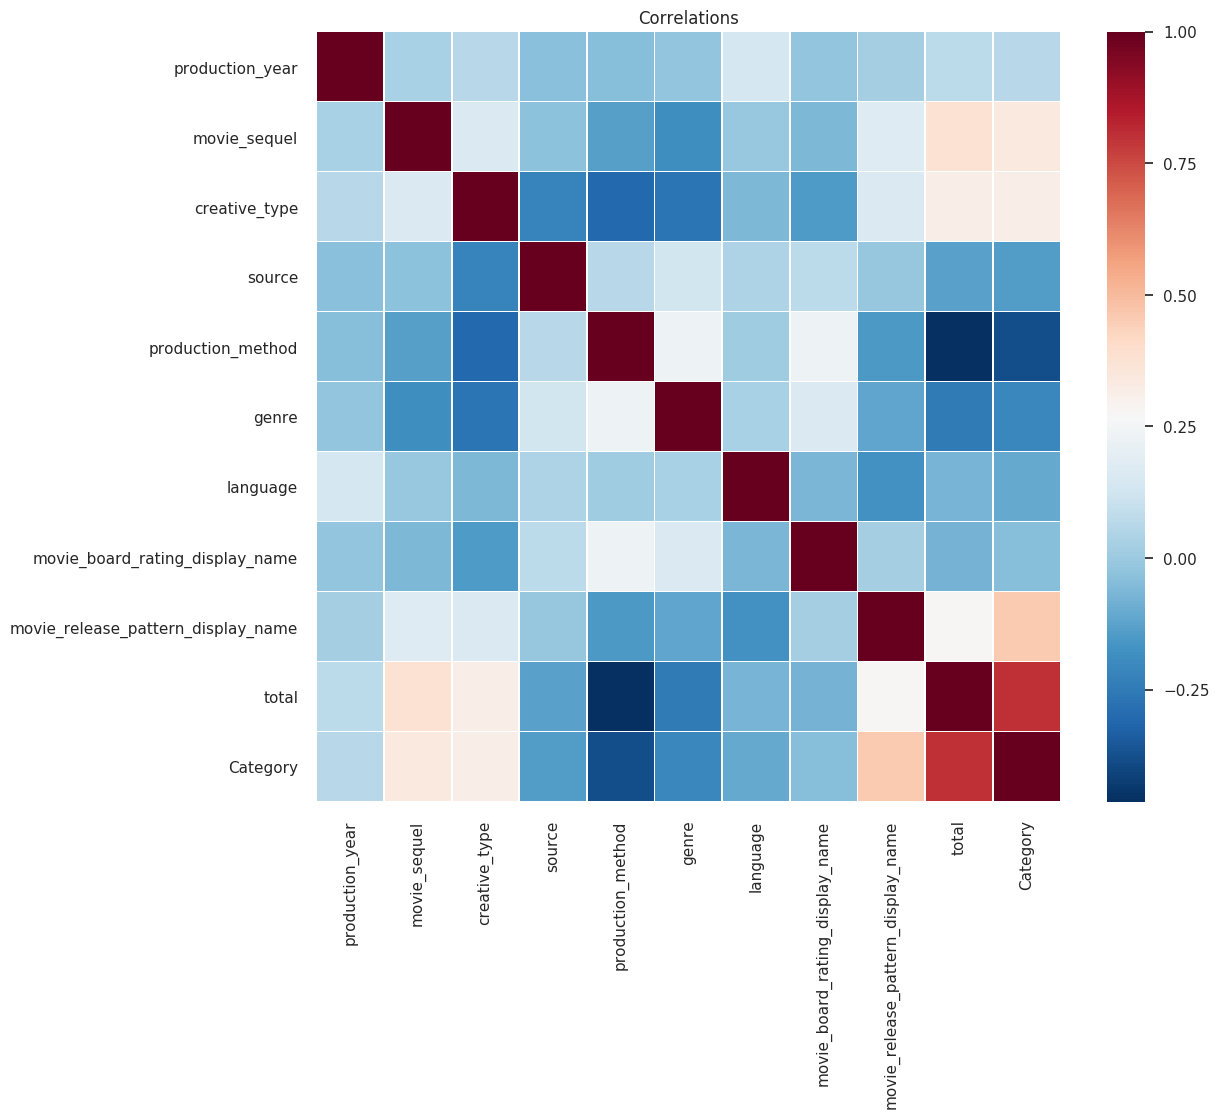

In [117]:
def encode_objects(df_):
    # we dont want the original data to be modified - using shallow copy
    df = df_.copy()
    for column in df.columns:
        if df.dtypes[column] == np.object:
            enc = LabelEncoder()
            df[column] = enc.fit_transform(df[column])
    return df



data_corr = data[["production_year", "movie_sequel", "creative_type", "source",
                  "production_method", "genre", "language", 
                  "movie_board_rating_display_name", "movie_release_pattern_display_name", "total", "Category"]]

# Calculate the correlation and plot it
f = plt.figure(figsize=(12,10))
ax1 = f.add_subplot(111)
data_ = encode_objects(data_corr)
correlations = data_.corr()
g1 = sns.heatmap(correlations, linewidths=.5, cmap = "RdBu_r")
ax1.set_title("Correlations")

plt.show()

Profiling the data to have a better understanding of the variables.
(In the report, the categorical/text variables will be ignored in the correlation plots).

In [111]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="output.html")

[Profiled Report of the dataset](output.html)

Quick learning from the data:

    - We do not have any missing values in the data.
    - There are 9 categorical, 4 numeric, 1 boolean and 1 text field.
    - As seen from the correlation plots, the fields _movie sequel_, creative type have good correlation with Category.
    - The field total is highly correlated with our target (as expected).

To Do:

    - Do one hot encoding on all the categorical variables
    - Vectorize the text field (board_rating_reason) | try with and without the text field for modeling